In [ ]:
from yandex_cloud_ml_sdk import YCloudML
# You can set authentication using environment variables instead of the 'auth' argument:
# YC_OAUTH_TOKEN, YC_TOKEN, YC_IAM_TOKEN, or YC_API_KEY
# You can also set 'folder_id' using the YC_FOLDER_ID environment variable
sdk = YCloudML(
    # folder_id="<YC_FOLDER_ID>",
    # auth="<YC_API_KEY/YC_IAM_TOKEN>",
)
model = sdk.models.image_generation('yandex-art')

===Simple run with model configuration

ImageGenerationModelResult(model_version='', image_bytes=<816822 bytes>)


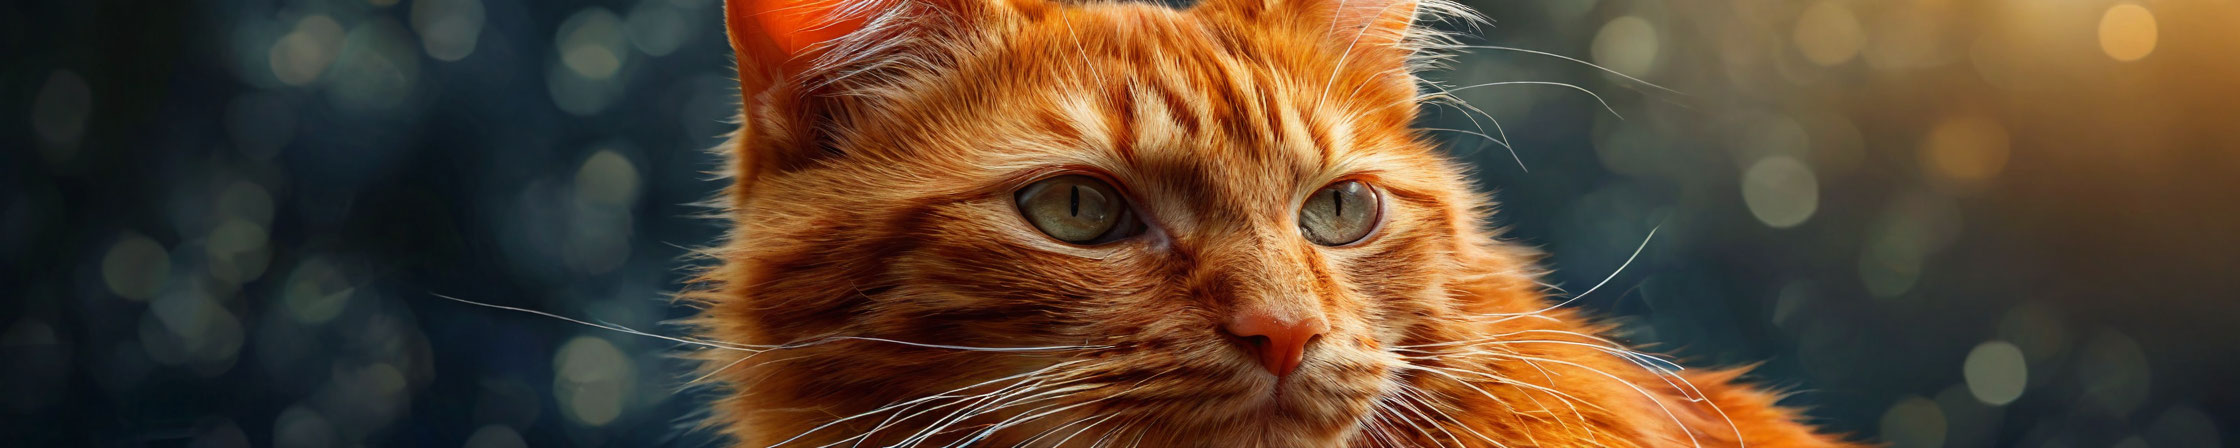

In [4]:
configured_model = model.configure(height_ratio=1, width_ratio=5, seed=50)
operation = configured_model.run_deferred('a red cat')
result = operation.wait()

print(result)  # print will print a result object
result  # this will tigger _repr_png_

===Run with a several messages and with saving image to file

In [3]:
import pathlib

path = pathlib.Path('image.jpeg')

try:
    operation = model.run_deferred(['a red cat', 'Miyazaki style'])
    result = operation.wait()
    path.write_bytes(result.image_bytes)
finally:
    path.unlink(missing_ok=True)

===Control of image size in jupyter

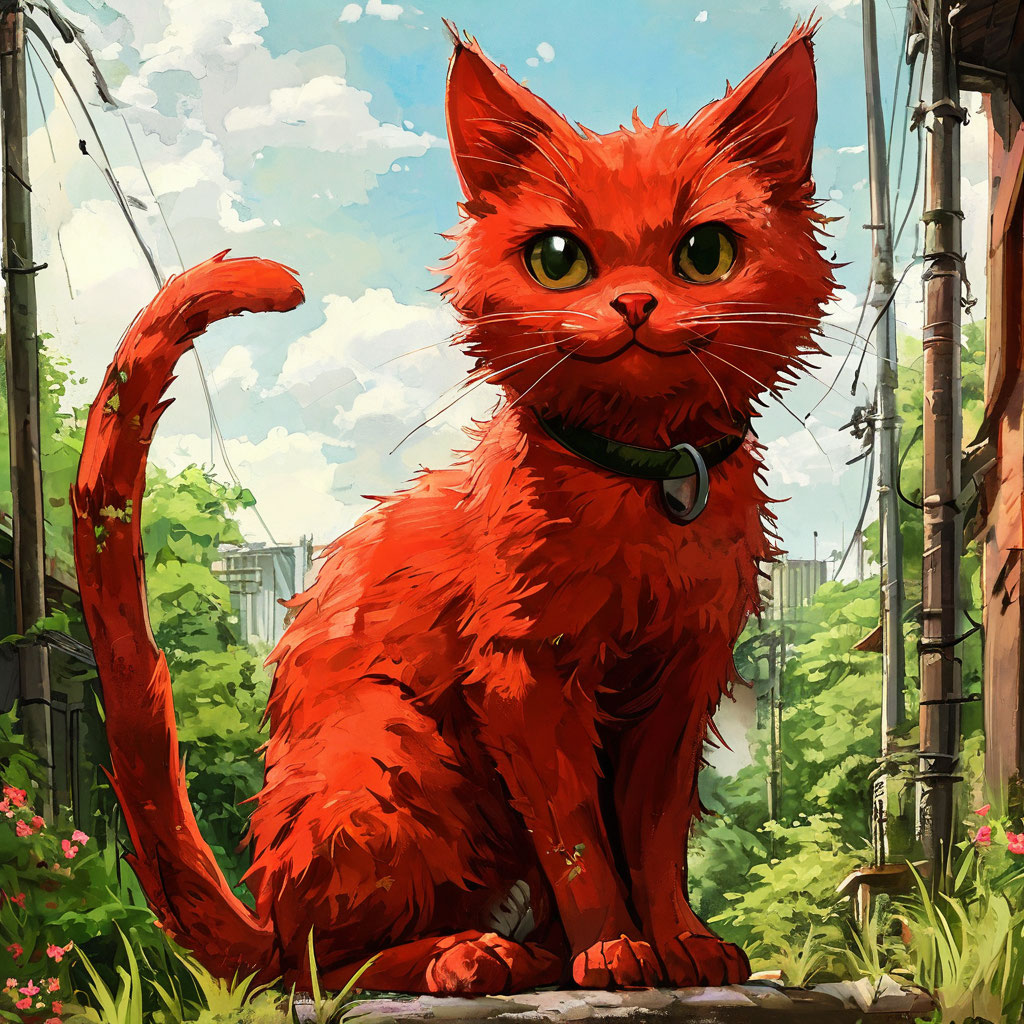

In [4]:
from IPython.display import Image
Image(result.image_bytes, width=300)

===Integration with a gpt model

In [5]:
gpt = sdk.models.completions('yandexgpt')
gpt_results = [
    gpt.run([
        'you need to create a prompt for a yandexart model',
        f'of a cat in a {style} style'
    ])  
    for style in ['Miyazaki', 'Vincent Willem van Gogh', 'Leonardo di ser Piero da Vinci']
]

In [7]:
image_operations = [
    model.run_deferred(gpt_result)
    for gpt_result in gpt_results
]
image_results = [operation.wait() for operation in image_operations]

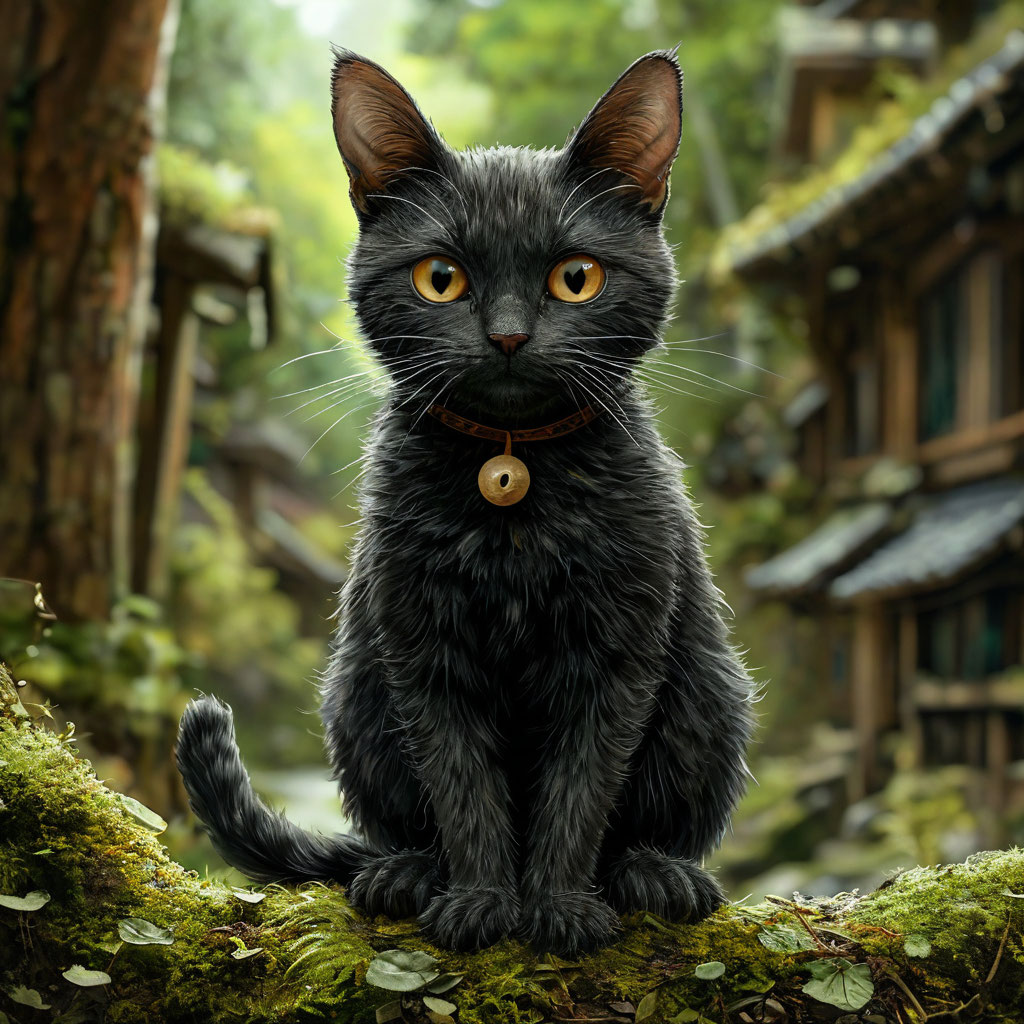

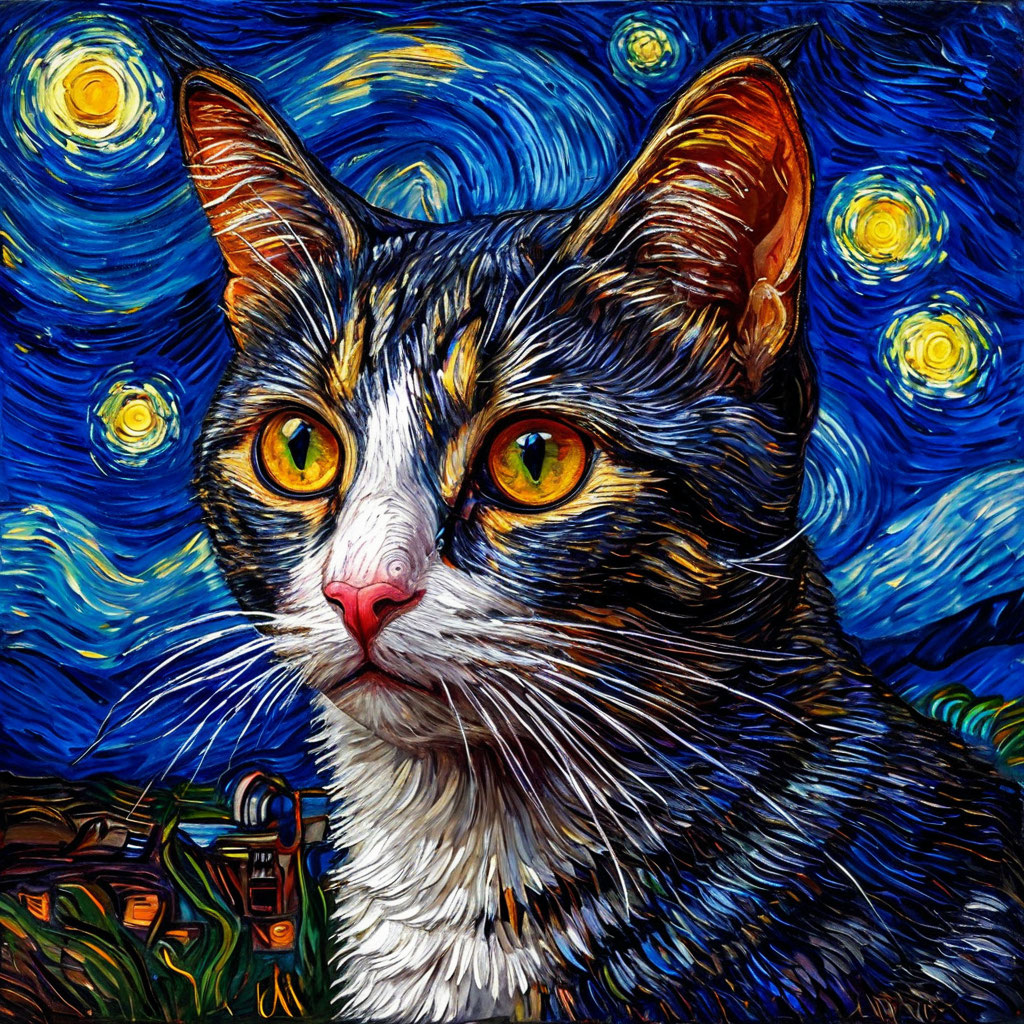

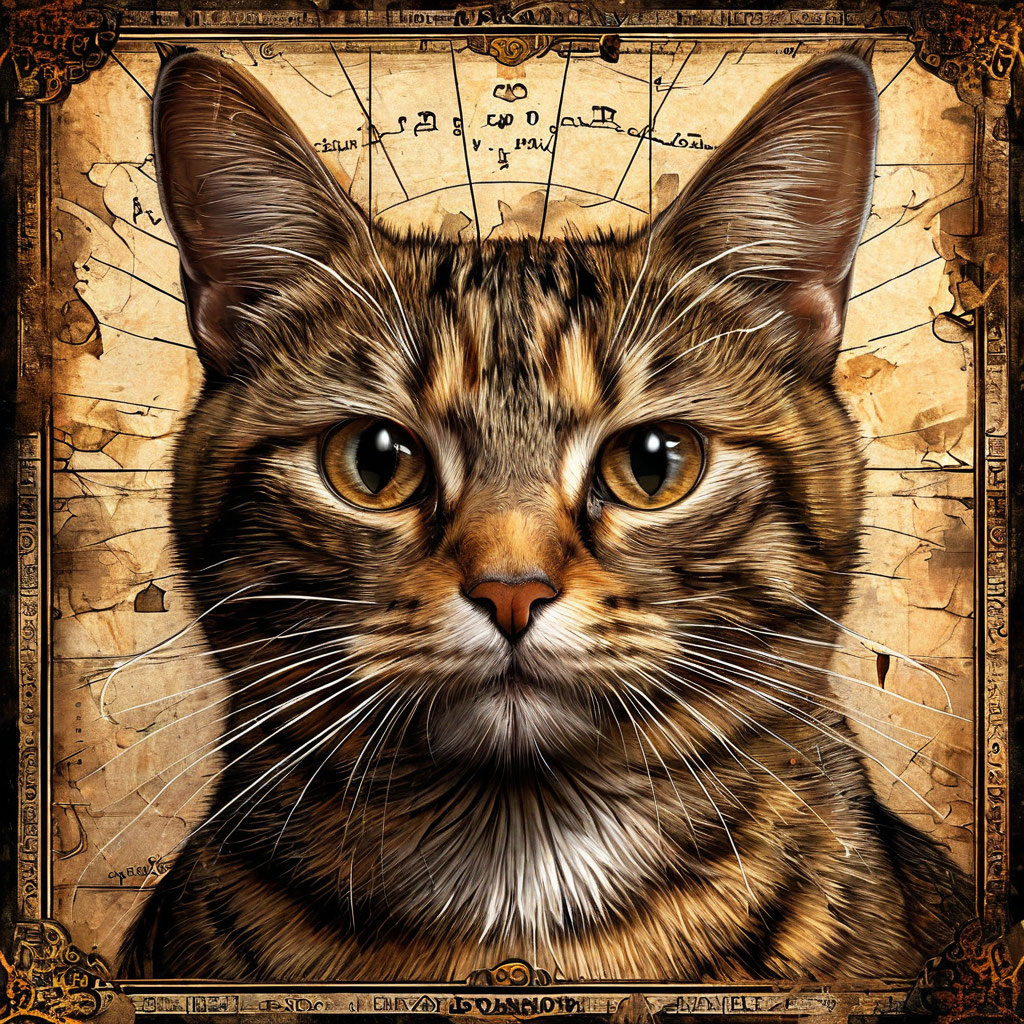

In [8]:
from IPython.display import Image, display

display(*[Image(result.image_bytes, width=200) for result in image_results])